In [14]:
import os
setup_script = os.path.join(os.environ['ENV_JUPYTER_SETUPS_DIR'], 'setup_sci_env_basic.py')
%run $setup_script

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
from scipy.stats import norm, poisson
from scipy.optimize import minimize

\begin{equation}
    \mathcal{L}_{comb}(\mathbf{x},\theta) = \prod^{N}_{i=1} \mathcal{L}(x_{i},\theta)
\end{equation}

\begin{equation}
    \ln \mathcal{L}_{comb}(\mathbf{x}, \theta) = \sum^{N}_{i=1} \ln \mathcal{L}(x_{i},\theta)
\end{equation}

Maximum likelihood estimator:

\begin{equation}
    \hat{\theta} = \underset{\theta}{\text{argmax}} ~ \mathcal{L}(\theta,\mathbf{x})
\end{equation}

\begin{equation}
    \hat{\theta} = \underset{\theta}{\text{argmin}} ~ \left[ - \ln \mathcal{L}(\theta,\mathbf{x}) \right]
\end{equation}

In [218]:
def likelihood(pars, x):
    l = np.exp(-(x-pars[0])**2/(2.0*pars[1]**2))/(np.sqrt(2.0*np.pi)*pars[1])
    return l

In [219]:
def log_likelihood(pars, x, likelihood):
    ll = np.log(likelihood(pars,x))
    return ll

In [271]:
def log_likelihood_raw(pars, x):
    ll = -0.5 * np.log(2.0*np.pi) - np.log(pars[1]) - (x-pars[0])**2/(2.0*pars[1]**2)
    return ll

In [266]:
def log_likelihood_comb(pars, X, log_likelihood):
    ll_sum = np.zeros(pars[0].shape)
    for xi in X:
        ll = log_likelihood(pars, xi)
        ll_sum += ll
    return ll_sum

In [235]:
def NLL(pars, X, likelihood):
    return -log_likelihood_comb(pars, X, likelihood)

In [227]:
def MLE(NLL, nPars, X):
    x0 = (1.0, 0.5)
    min_res = minimize(fun=NLL, x0=x0, args=(X, likelihood))
    return min_res

In [228]:
def MLE_profiled(likelihood, pars, x):
    def con(pars):
        return pars[0] - 1.0
    cons = {'type':'eq', 'fun': con}
    m = minimize(likelihood, pars, constraints=cons)

Generate a datasample

In [236]:
x_sample = norm.rvs(size=1000, loc=1.0, scale=0.5)

In [251]:
x = np.linspace(-5.0, 1.0, 100)
y = np.linspace(0.1, 5.0, 100)
X,Y = np.meshgrid(x,y)

In [267]:
X[0,0], Y[0,0]

(-5.0, 0.10000000000000001)

In [268]:
likelihood((X,Y), x_sample[0])

array([[  0.00000000e+000,   0.00000000e+000,   0.00000000e+000, ...,
          2.02100862e-034,   3.41680049e-031,   4.00083466e-028],
       [  0.00000000e+000,   0.00000000e+000,   0.00000000e+000, ...,
          1.20433244e-015,   3.35078176e-014,   7.90984666e-013],
       [  1.21489648e-279,   6.41962793e-275,   3.09167919e-270, ...,
          4.37500567e-009,   2.85894172e-008,   1.70273069e-007],
       ..., 
       [  2.82054039e-002,   2.87156184e-002,   2.92305922e-002, ...,
          7.87674129e-002,   7.90115330e-002,   7.92442909e-002],
       [  2.85184795e-002,   2.90240030e-002,   2.95340608e-002, ...,
          7.80309228e-002,   7.82679415e-002,   7.84939149e-002],
       [  2.88199491e-002,   2.93206655e-002,   2.98256990e-002, ...,
          7.73075526e-002,   7.75377412e-002,   7.77571900e-002]])

In [272]:
log_likelihood_raw((X,Y), x_sample[0])

array([[ -2.54439388e+03,  -2.50133200e+03,  -2.45863743e+03, ...,
         -7.75842965e+01,  -7.01514333e+01,  -6.30858796e+01],
       [ -1.13813301e+03,  -1.11886487e+03,  -1.09976107e+03, ...,
         -3.43528510e+01,  -3.10269976e+01,  -2.78654978e+01],
       [ -6.42226582e+02,  -6.31351540e+02,  -6.20569261e+02, ...,
         -1.92473580e+01,  -1.73702292e+01,  -1.55858624e+01],
       ..., 
       [ -3.56824169e+00,  -3.55031411e+00,  -3.53253944e+00, ...,
         -2.54125591e+00,  -2.53816145e+00,  -2.53521991e+00],
       [ -3.55720300e+00,  -3.53963210e+00,  -3.52221108e+00, ...,
         -2.55065008e+00,  -2.54761719e+00,  -2.54473417e+00],
       [ -3.54668746e+00,  -3.52946270e+00,  -3.51238487e+00, ...,
         -2.55996362e+00,  -2.55699048e+00,  -2.55416426e+00]])

In [248]:
log_likelihood_comb((X,Y), x_sample[:1], likelihood)

/home/edy/lib/build/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


array([[         -inf,          -inf,          -inf, ...,  -77.58429646,
         -70.1514333 ,  -63.0858796 ],
       [         -inf,          -inf,          -inf, ...,  -34.35285097,
         -31.02699762,  -27.86549781],
       [-642.22658207, -631.35154041, -620.56926074, ...,  -19.24735802,
         -17.37022921,  -15.5858624 ],
       ..., 
       [  -3.56824169,   -3.55031411,   -3.53253944, ...,   -2.54125591,
          -2.53816145,   -2.53521991],
       [  -3.557203  ,   -3.5396321 ,   -3.52221108, ...,   -2.55065008,
          -2.54761719,   -2.54473417],
       [  -3.54668746,   -3.5294627 ,   -3.51238487, ...,   -2.55996362,
          -2.55699048,   -2.55416426]])

In [205]:
Z = NLL((X,Y), x_sample, likelihood)

/home/edy/lib/build/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


In [206]:
Z.shape

()

ValueError: not enough values to unpack (expected 2, got 0)

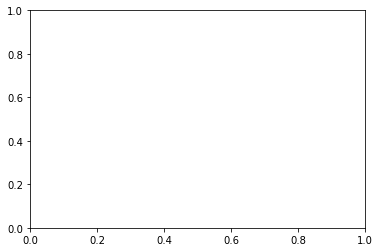

In [156]:
f,a = plt.subplots()
a.pcolor(X, Y, Z, cmap='RdBu_r')

In [74]:
log_likelihood_comb((1.0, 0.5), x_sample, likelihood)

-707.65843456751293

In [75]:
MLE(log_likelihood_comb, 2, x_sample)

      fun: -16969.680819795365
 hess_inv: array([[  2.04426702e+06,  -5.37106410e+07],
       [ -5.37106410e+07,   1.41118276e+09]])
      jac: array([ 0.,  0.])
  message: 'Optimization terminated successfully.'
     nfev: 120
      nit: 25
     njev: 30
   status: 0
  success: True
        x: array([ -355557.93070733,  9341879.07953585])